_______Gerald Clark CMSI 630 exercise2_____
           age  sex       bmi  children  smoker    region   charges
0     0.021739    1  0.321227       0.0       1  0.000000  0.251611
1     0.000000    0  0.479150       0.2       0  0.333333  0.009636
2     0.217391    0  0.458434       0.6       0  0.333333  0.053115
3     0.326087    0  0.181464       0.0       0  0.666667  0.333010
4     0.304348    0  0.347592       0.0       0  0.666667  0.043816
...        ...  ...       ...       ...     ...       ...       ...
1333  0.695652    0  0.403820       0.6       0  0.666667  0.151299
1334  0.000000    1  0.429379       0.0       0  1.000000  0.017305
1335  0.000000    1  0.562012       0.0       0  0.333333  0.008108
1336  0.065217    1  0.264730       0.0       0  0.000000  0.014144
1337  0.934783    1  0.352704       0.0       1  0.666667  0.447249

[1338 rows x 7 columns]


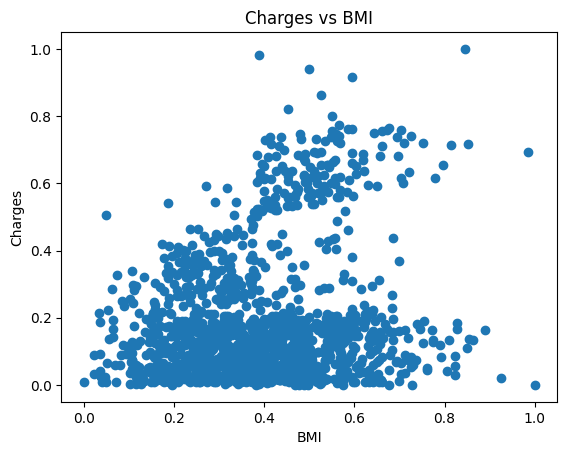

           age  sex       bmi  children  smoker    region
332   0.934783    1  0.408932       0.0       0  0.666667
355   0.608696    0  0.313156       0.0       0  0.000000
138   0.782609    1  0.428840       0.6       0  0.333333
381   0.804348    0  0.396153       0.0       1  1.000000
292   0.152174    0  0.795803       0.4       1  0.333333
...        ...  ...       ...       ...     ...       ...
1095  0.000000    1  0.414044       0.8       0  1.000000
1130  0.456522    1  0.212806       1.0       0  0.333333
1294  0.869565    0  0.247915       0.0       0  1.000000
860   0.413043    1  0.851224       0.4       1  0.000000
1126  0.804348    0  0.375034       0.0       0  0.000000

[936 rows x 6 columns]
intercept: -0.06620756131773753, slope, m: [ 0.19209991 -0.0017502   0.20442182  0.03386911  0.37703667  0.01563305]
r2_score:  0.7694415927057693
r2 score:  0.7694415927057693


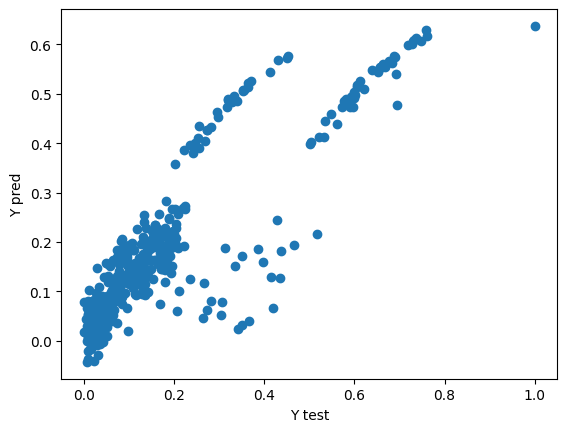

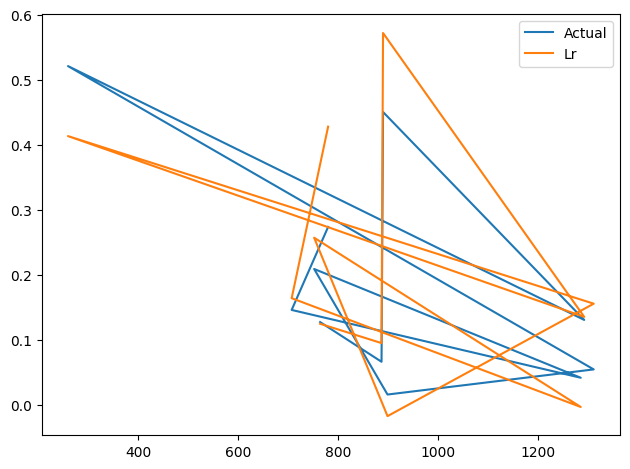

____complete____


In [2]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from IPython.display import display

print("_______Gerald Clark CMSI 630 exercise2_____")


def i_func():
    # train data, dataframe_insurance
    i_data = "insurance_data/insurance.csv"
    df_i = pd.read_csv(i_data, usecols=["age", "sex", "bmi", "children", "smoker", "region", "charges"], 
                       encoding='utf-8', na_values=['?',''], index_col=False)

    df_i.to_excel("insurance_train.xlsx")
    #print(df_i)

    # change train data to numerical data
    df_i['sex'] = df_i['sex'].apply({'male':0, 'female':1}.get)
    df_i['smoker'] = df_i['smoker'].apply({'yes':1, 'no':0}.get)
    df_i['region'] = df_i['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

    col_names = ['age','bmi', 'children', 'region', 'charges'] # translate all values that are not a 1 or 0 into val between 1,0
    features = df_i[col_names]

    scaler = StandardScaler()
    df_i[col_names] =  scaler.fit_transform(features.values)

    min_max_scaler = MinMaxScaler()
    df_i[col_names] = min_max_scaler.fit_transform(features.values)

    df_i.to_excel("new_insurance_dataframe.xlsx")
    print(df_i)

    #scatter for bmi
    plt.scatter('bmi', 'charges', data=df_i)
    plt.title('Charges vs BMI')
    plt.xlabel('BMI')
    plt.ylabel('Charges')
    plt.show()
    
    # drop sex column for it has low correlation
    X = df_i.drop(['charges'], axis = 1)
    #X = df_i['bmi'].values
    y = df_i['charges']
    #X = df_i.iloc[:, 2].values
    #y = df_i.iloc[:,-1].values

    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
    print(X_train)

    lr = LinearRegression().fit(X_train, y_train)
    #y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    #print(df_i_new)

    c = lr.intercept_
    m = lr.coef_
    print(f'intercept: {c}, slope, m: {m}')
    print('r2_score: ', lr.score(X_test, y_test))
    print("r2 score: ",(r2_score(y_test, y_test_pred)))



    #plt.scatter(X_train, y_train, color="red")
    #plt.plot(X_train, y_train_pred, color="blue")
    plt.scatter(y_test, y_test_pred)
    plt.xlabel('Y test')
    plt.ylabel('Y pred')
    plt.show()

        #line plot y test to y actual
    df_a = pd.DataFrame({'Actual':y_test,'Lr':y_test_pred})
    plt.plot(df_a['Actual'].iloc[0:11],label='Actual')
    plt.plot(df_a['Lr'].iloc[0:11],label='Lr')
    plt.tight_layout()
    plt.legend()
    plt.show()
  
    
    print("____complete____")
i_func()









# https://www.kaggle.com/code/kaggleashwin/linear-regression-on-insurance-dataset

# https://python.plainenglish.io/data-exploration-with-pandas-and-matplolib-69c24cb5ecee

# https://www.kaggle.com/code/kianwee/linear-regression-insurance-dataset